# Using LSTMs for predictive analysis of historical Netflix Stock Price


Loading data and exploring it

In [1]:
#importing the data
import pandas as pd
data= pd.read_csv('NFLX.csv',index_col='Date',parse_dates=True)

In [2]:
data.head() #selecting first five rows from the data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200


In [3]:
data.isna().any() #checking for any null value

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [4]:
data.describe() #staistical values of the data

,Open,High,Low,Close,Adj Close,Volume
count,354.000000,354.000000,354.000000,354.000000,354.000000,3.540000e+02
mean,342.920961,348.378870,337.676921,343.352287,343.352287,7.968999e+06
std,42.677166,43.313112,41.914822,42.467089,42.467089,4.451565e+06
min,255.710007,265.000000,252.279999,254.589996,254.589996,2.019300e+06
25%,307.522491,313.440010,303.877502,310.017494,310.017494,5.168425e+06
50%,348.584991,353.729995,342.850006,349.600006,349.600006,6.648800e+06
75%,367.355003,371.737488,361.832489,367.702499,367.702499,9.050200e+06
max,454.250000,458.970001,450.470001,454.190002,454.190002,3.825890e+07


In [5]:
data.shape #(rows,columns)

(354, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 354 entries, 2019-01-02 to 2020-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       354 non-null    float64
 1   High       354 non-null    float64
 2   Low        354 non-null    float64
 3   Close      354 non-null    float64
 4   Adj Close  354 non-null    float64
 5   Volume     354 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.4 KB


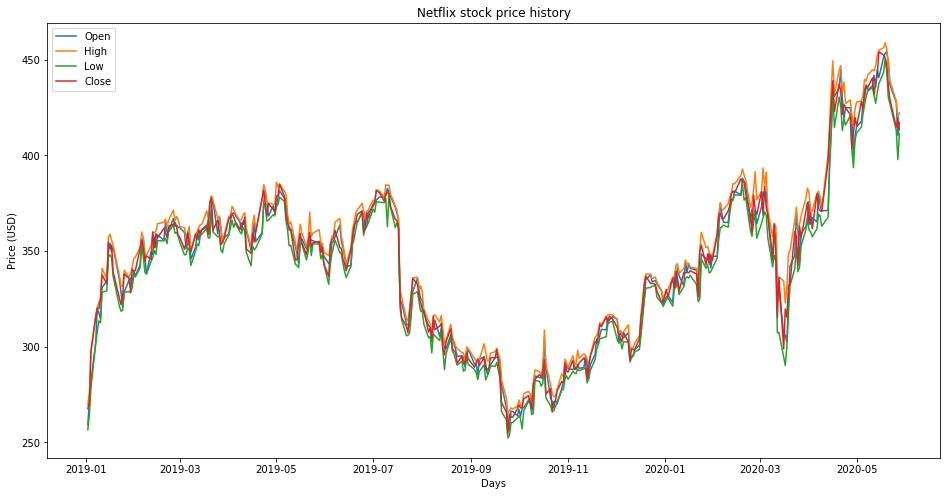

In [7]:
#visualiing the Netflix historical data
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Low"])
plt.plot(data["Close"])
plt.title('Netflix stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

Text(0, 0.5, 'Open (Price USD)')

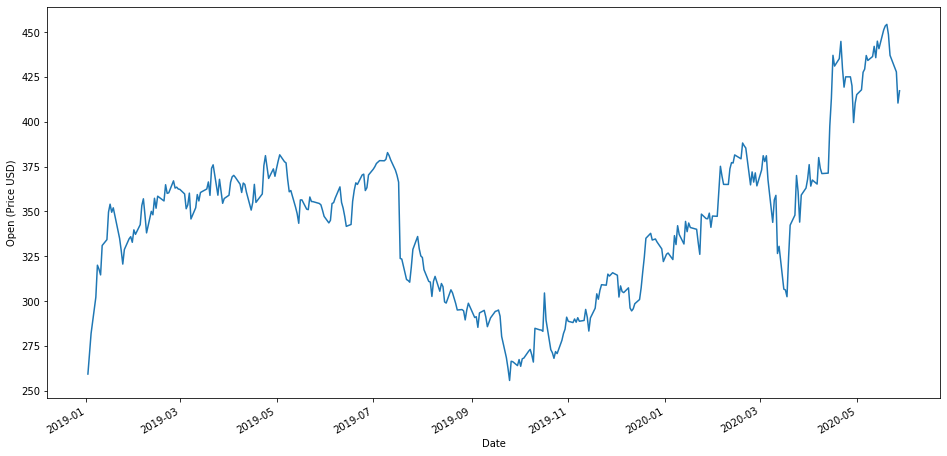

In [8]:
data['Open'].plot(figsize=(16,8)) #open ptice of Netflix 
plt.ylabel('Open (Price USD)')

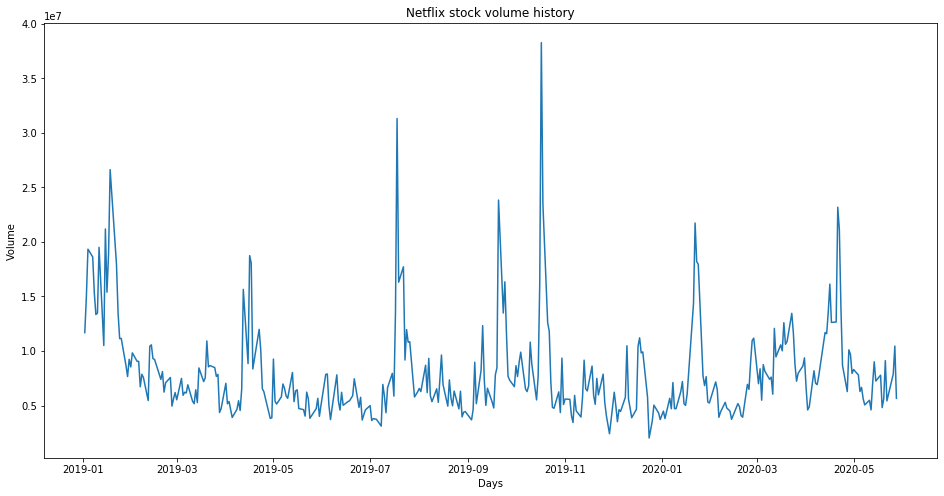

In [9]:

plt.figure(figsize=(16,8))
plt.plot(data["Volume"])
plt.title('Netflix stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [10]:
data['Volume']=data['Volume'].astype(float) #changing the datatype of Volume column from int to float

In [11]:
data.rolling(5).mean().head(10) #using rolling to get the prices of past 5 days and get their average

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,286.688007,296.145996,281.841999,294.408002,294.408002,15991700.0
2019-01-09,298.374005,306.865997,293.226001,304.867999,304.867999,16324440.0
2019-01-10,307.248004,316.781995,302.840003,315.559997,315.559997,16025020.0
2019-01-11,317.064001,325.439996,312.835999,323.563995,323.563995,16059080.0
2019-01-14,323.491998,329.176001,318.332001,327.083996,327.083996,14434980.0


Text(0, 0.5, 'USD')

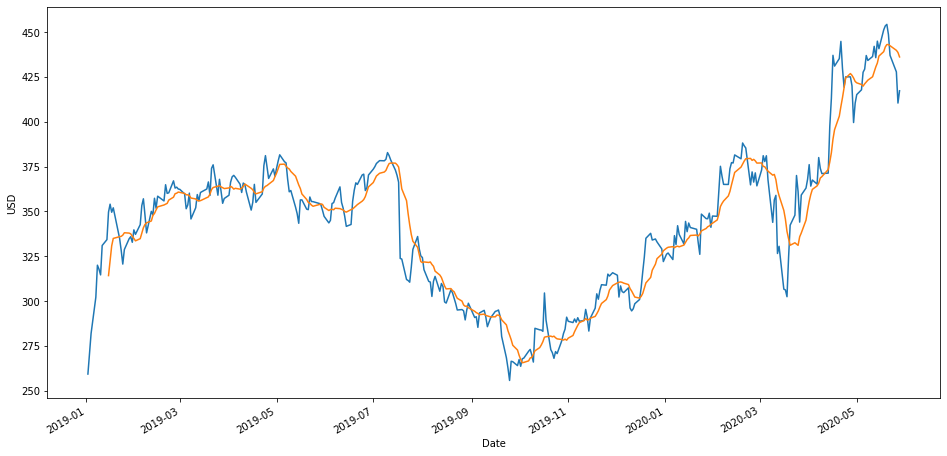

In [12]:
data['Open'].plot(figsize=(16,8))
data.rolling(window=10).mean()['Close'].plot() #Moving average of Close for past 10 days
plt.ylabel('USD')

Text(0, 0.5, 'USD')

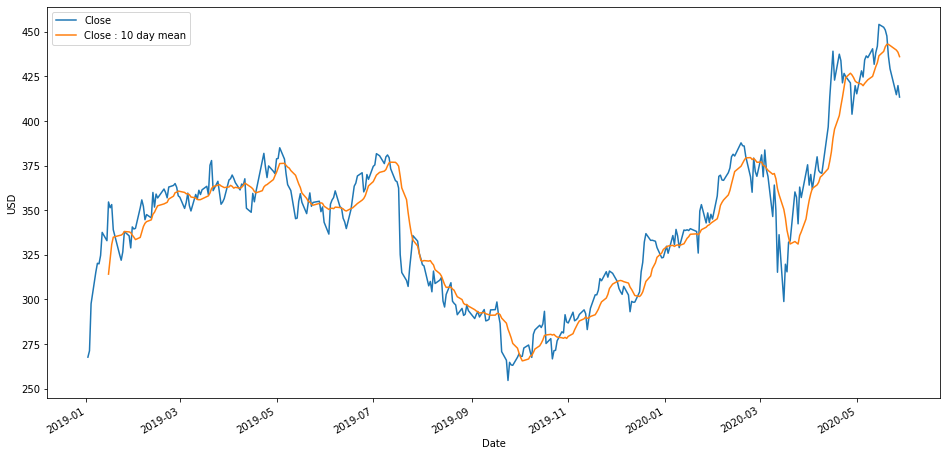

In [13]:
data['Close : 10 day mean']=data['Close'].rolling(window=10).mean() 
data[['Close','Close : 10 day mean']].plot(figsize=(16,8)) #Close values with moving 5 days moving values.
plt.ylabel('USD')

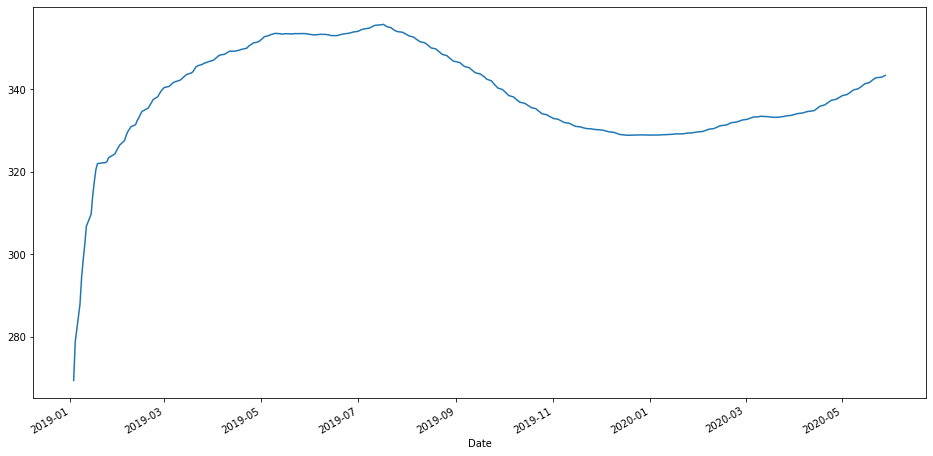

In [14]:
data['Close'].expanding(min_periods=2).mean().plot(figsize=(16,8)) #specifying a minimum number of periods

In [15]:
training_set= data['Open']
training_set= pd.DataFrame(training_set) #Creating a training dataframe

In [16]:
#Scaling the feature
from sklearn.preprocessing import MinMaxScaler
pre_sca= MinMaxScaler(feature_range=(0,1))
training_set_scaled=pre_sca.fit_transform(training_set)

LSTMs expect our data to be in a specific format, usually a 3D array. We start by creating data in 10 timesteps and converting it into an array using NumPy. Next, we convert the data into a 3D dimension array with X_train samples.

In [17]:
#creating a data structure with 10 timestamps for 1 output
import numpy as np
X_train =[]
y_train= []
for i in range(10, 353):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
# Importing tensorflow library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\swami\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\swami\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\swami\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\swami\anaconda3\e

**Creating RNN**


A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. LSTMs are very powerful in sequence prediction problems because they’re able to store past information. This is important in our case because the previous price of a stock is crucial in predicting its future price.

**Creating LSTM**

We add the LSTM layer and later add a few Dropout layers to prevent overfitting. We add the LSTM layer with the following arguments:

1. 10 units which is the dimensionality of the output space
2. return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence
3. input_shape as the shape of our training set.

When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped. Thereafter, we add the Dense layer that specifies the output of 1 unit. After this, we compile our model using the popular adam optimizer and set the loss as the mean_squarred_error. This will compute the mean of the squared errors. Next, we fit the model to run on 50 epochs with a batch size of 10. Keep in mind that, depending on the specs of your computer, this might take a few minutes to finish running.


In [19]:
# Initialising the RNN
regressor = Sequential() #in this stage the data is fed to the neural network and trained for prediction assingning random biases and weights

#Adding the 1st LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a 2nd LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a 3rd LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a 4th LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))




In [20]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 10)



Epoch 1/50
343/343 [==============================] - 3s 9ms/step - loss: 0.1157
Epoch 2/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0431
Epoch 3/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0306
Epoch 4/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0239
Epoch 5/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0212
Epoch 6/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0202
Epoch 7/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 8/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0172
Epoch 9/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0180
Epoch 10/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0203
Epoch 11/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0185
Epoch 12/50
343/343 [==============================] - 1s 2ms/step - loss: 0.0169A: 0s - loss:
Epoch 13/50

In [21]:
#Making the prediction and visulization
data_test = pd.read_csv('NFLX.csv',index_col="Date",parse_dates=True)


In [22]:
real_stock_price = data_test.iloc[:, 1:2].values

In [23]:
data_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200


In [24]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 354 entries, 2019-01-02 to 2020-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       354 non-null    float64
 1   High       354 non-null    float64
 2   Low        354 non-null    float64
 3   Close      354 non-null    float64
 4   Adj Close  354 non-null    float64
 5   Volume     354 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.4 KB


In [25]:
data_test["Volume"] = data_test["Volume"].astype(float)

In [26]:
test_set=data_test['Open']
test_set=pd.DataFrame(test_set)

In [27]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 354 entries, 2019-01-02 to 2020-05-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    354 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


**Predicting Future Stock using the Test Set**

In order to predict future stock prices we need to do a couple of things after loading in the test set:

1. Merge the training set and the test set on the 0 axis.
2. Set the time step as 60 (as seen previously)
3. Use MinMaxScaler to transform the new dataset
4. Reshape the dataset as done previously
After making the predictions we use inverse_transform to get back the stock prices in normal readable format.

In [28]:
# Getting the predicted stock price
data_total = pd.concat((data['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = pre_sca.transform(inputs)
X_test = []
for i in range(10, 350):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = pre_sca.inverse_transform(predicted_stock_price)

In [29]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       340 non-null    float32
dtypes: float32(1)
memory usage: 1.5 KB


**Plotting the Results**
 
Finally, we use Matplotlib to visualize the result of the predicted stock price and the real stock price.

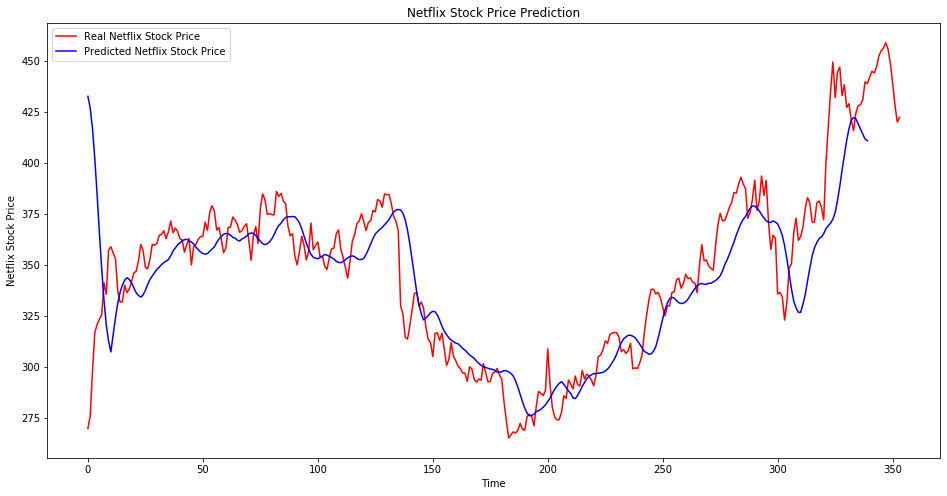

In [30]:
# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price, color = 'red', label = 'Real Netflix Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()
 

In this project a deep learning model was developed to predict the future behavior of stock pries. From the plot we can see  the fluctuation in the real stock price while our model also predicted a similar trend in the stock price. This clearly shows how powerful LSTMs are for analyzing time series and sequential data.

